# Qbraid challenge
## Team name: Quackers
## Project: Hybrid Quantum-classical model for classification
### Team members:
-  Esteban Payares
-  Vismai Khanderao
-  <"your name">

---

## Introduction

<div style="text-align: justify;">Quantum machine learning is a research area that explores the interplay of ideas from quantum computing and machine learning. For example, we might want to find out whether quantum computers can speed up the time it takes to train or evaluate a machine learning model. On the other hand, we can leverage techniques from machine learning to help us uncover quantum error-correcting codes, estimate the properties of quantum systems, or develop new quantum algorithms. The limits of what machines can learn have always been defined by the computer hardware we run our algorithms on—for example, the success of modern-day deep learning with neural networks is enabled by parallel GPU clusters. Quantum machine learning extends the pool of hardware for machine learning by an entirely new type of computing device—the quantum computer. Information processing with quantum computers relies on substantially different laws of physics known as quantum theory. In the modern viewpoint, quantum computers can be used and trained like neural networks. We can systematically adapt the physical control parameters, such as an electromagnetic field strength or a laser pulse frequency, to solve a problem. For example, a trained circuit can be used to classify the content of images, by encoding the image into the physical state of the device and taking measurements.</div>

## Circuit Ansatz
In the context of variational circuits, an ansatz usually describes a subroutine consisting of a sequence of gates applied to specific wires. Similar to the architecture of a neural network, this only defines the base structure, while the types of gates and/or their free parameters can be optimized by the variational procedure. in this case we used a strongly entangling circuit where the 2-qubit gates, act chronologically on each Qubit.
### Ansatz used:
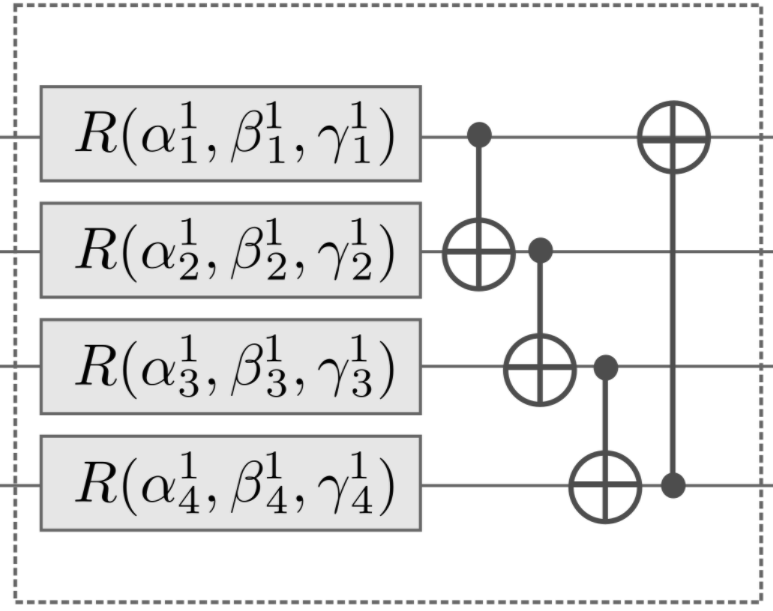

## Methods
To develop this model we initialize three layers, two Classical Dense Layers, and one Quantum Layer which consist of the 4 Qubit Ansatz described above. The first layer is a
Rectified Linear Unit (ReLU) function. The second is the quantum variational circuit where we encode our data using the angle embdding method principle: represent classical data as quantum states in a high-dimensional Hilbert space encoding a set of N features into the rotations angles of n qubits, in this case of 4 Qubits and lastly we defined the output as 4 measurements of expected values with PauliZ gates. The last layer consists of a Softmax function. Once our layers are defined we performed the training of the hybrid model to classify the data given, in this case by the scikit-learn dataset make_circles which consist of two classes.

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
import pennylane as qml
import tensorflow as tf
import numpy as np
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

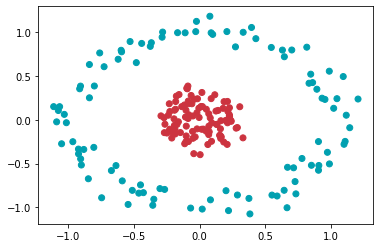

In [2]:
np.random.seed(42)
tf.random.set_seed(42)

X, y = make_circles(n_samples=200, noise=0.1, factor=0.2, random_state=1)
y_hot = tf.keras.utils.to_categorical(y, num_classes=2)  

c = ["#00A0B0" if y_ == 0 else "#CC333F" for y_ in y] 
plt.scatter(X[:, 0], X[:, 1], c=c)
plt.show()

In [3]:
import pennylane as qml

n_qubits = 4
dev = qml.device("default.qubit", wires=n_qubits)

@qml.qnode(dev)
def qnode(inputs, weights):
    qml.templates.AngleEmbedding(inputs, wires=range(n_qubits))
    qml.templates.StronglyEntanglingLayers(weights, wires=range(n_qubits))
    return [qml.expval(qml.PauliZ(wires=i)) for i in range(n_qubits)]

In [4]:
n_layers = 1
weight_shapes = {"weights": (n_layers, n_qubits, 3)}
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(n_qubits,activation='relu',input_dim=2))
model.add(qml.qnn.KerasLayer(qnode, weight_shapes, output_dim=n_qubits))
model.add(tf.keras.layers.Dense(2, activation='softmax'))

opt = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=["accuracy"])

In [5]:
history = model.fit(X, y_hot, validation_data=(X, y_hot), epochs=20, batch_size=5)

Epoch 1/20
40/40 [==============================] - 54s 1s/step - loss: 0.8123 - accuracy: 0.5236 - val_loss: 0.6691 - val_accuracy: 0.6950
Epoch 2/20
40/40 [==============================] - 52s 1s/step - loss: 0.6493 - accuracy: 0.7227 - val_loss: 0.6295 - val_accuracy: 0.6750
Epoch 3/20
40/40 [==============================] - 52s 1s/step - loss: 0.6343 - accuracy: 0.6564 - val_loss: 0.6000 - val_accuracy: 0.6800
Epoch 4/20
40/40 [==============================] - 52s 1s/step - loss: 0.5842 - accuracy: 0.6935 - val_loss: 0.5516 - val_accuracy: 0.7750
Epoch 5/20
40/40 [==============================] - 53s 1s/step - loss: 0.5417 - accuracy: 0.7717 - val_loss: 0.4772 - val_accuracy: 0.8500
Epoch 6/20
40/40 [==============================] - 52s 1s/step - loss: 0.4852 - accuracy: 0.8332 - val_loss: 0.3965 - val_accuracy: 0.8850
Epoch 7/20
40/40 [==============================] - 53s 1s/step - loss: 0.3696 - accuracy: 0.9144 - val_loss: 0.3158 - val_accuracy: 0.8850
Epoch 8/20
40/40 [==

## Actual Quantum layer

In [6]:
print(qnode.draw())

 0: ──RX(0)─────Rot(0.297, -0.0344, -0.894)───╭C──────────╭X──┤ ⟨Z⟩ 
 1: ──RX(0)─────Rot(-1.39, 8.61e-07, -0.226)──╰X──╭C──────│───┤ ⟨Z⟩ 
 2: ──RX(2.23)──Rot(-1.57, -0.203, -0.394)────────╰X──╭C──│───┤ ⟨Z⟩ 
 3: ──RX(0)─────Rot(0.472, -0.026, -0.79)─────────────╰X──╰C──┤ ⟨Z⟩ 



## Results

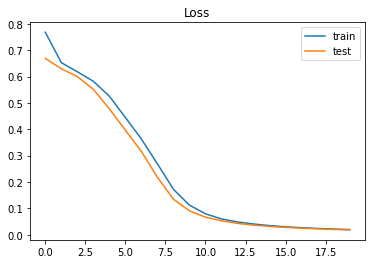

In [7]:
from matplotlib import pyplot

pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

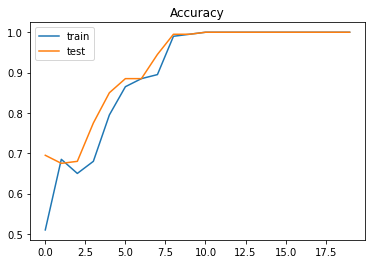

In [8]:

pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()

In [9]:
predy = model.predict(X)

In [10]:
rounded_labels_pred=np.argmax(predy, axis=1)
rounded_labels_pred

array([0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0])

In [11]:
rounded_labels_real = np.argmax(y_hot , axis=1)
rounded_labels_real

array([0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0])

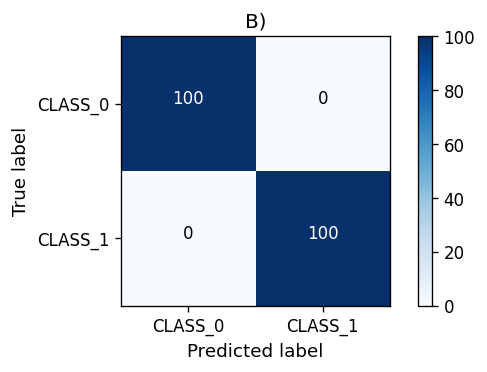

In [12]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(rounded_labels_real, rounded_labels_pred)

import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    fig = plt.figure(figsize=(5, 3), dpi=120)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label', fontsize=11)
    plt.xlabel('Predicted label', fontsize=11)
    plt.show()
    return fig
fig = plot_confusion_matrix(cm, 
                      normalize    = False,
                      target_names = ['CLASS_0', 'CLASS_1'],
                      title        = "B)")

In [13]:
colours_prediction = {"correct": "#00A0B0", "incorrect": "#CC333F"}
markers = ["o", "v"]


def plot_points_prediction(x, y, p):
    c = {0: [], 1: [], 2: []}
    x_ = {0: [], 1: [], 2: []}

    for i in range(200):
        x_[y[i]].append(x[i])
        if p[i] == y[i]:
            c[y[i]].append(colours_prediction["correct"])
        else:
            c[y[i]].append(colours_prediction["incorrect"])
    fig = plt.figure(figsize=(5,5), dpi=100) 
    for i in range(2):
        x_class = np.array(x_[i])
        plt.scatter(x_class[:, 0], x_class[:, 1], c=c[i], marker=markers[i])
        
    plt.xlabel("Feature 1", fontsize=11)
    plt.ylabel("Feature 2", fontsize=11)
    plt.title("A)")
    plt.grid()
    
    ax = plt.gca()
    ax.set_aspect(1)
    c_transparent = "#00000000"

    custom_lines = [
        Patch(
            facecolor=colours_prediction["correct"],
            edgecolor=c_transparent, label="Correct"
        ),
        Patch(
            facecolor=colours_prediction["incorrect"],
            edgecolor=c_transparent, label="Incorrect"
        ),
        Line2D([0], [0], marker=markers[0], color=c_transparent, label="Class_0",
               markerfacecolor="black", markersize=10),
        Line2D([0], [0], marker=markers[1], color=c_transparent, label="Class_1",
               markerfacecolor="black", markersize=10),
    ]

    ax.legend(handles=custom_lines)
    return fig

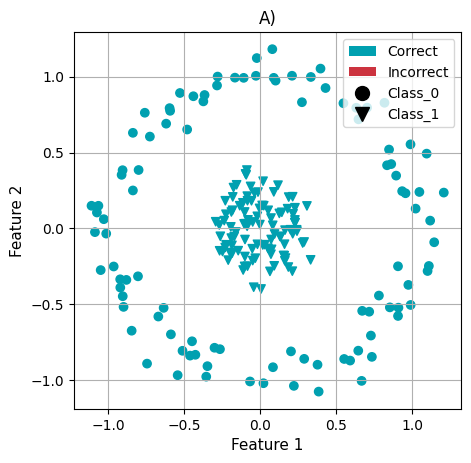

In [14]:
fig = plot_points_prediction(X, rounded_labels_real, rounded_labels_pred)

## Conclusions
As we can see from the results, it is possible to use quantum layers to explore the possibilities of quantum computing in the field of machine learning. The classification task was done with a perfect result.

## References
- [1] https://pennylane.ai/